In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split      # for spliting the data into train and test 
from sklearn.tree import DecisionTreeClassifier           # For creating a decision a tree
from sklearn import tree                                  # for displaying the tree
from sklearn.metrics import classification_report         # for calculating accuracy
from sklearn import preprocessing                         # As we have applied encoding technique we have used this preprocessing library                   

In [2]:
iris = pd.read_csv("iris.csv", index_col = 0)       # In order to set the index to 0 we have mentioned that index_col = 0

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Converting the species column to numbers so we will use encoding technique called as label encoder

label_encoder = preprocessing.LabelEncoder()            # This is called function calling
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [6]:
# Splitting the data in x and y for classification purpose, for performing any classification we are required to split the data first in input and output

x = iris.iloc[:,0:4]
y = iris['Species']

In [7]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [8]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [9]:
iris['Species'].unique()                # for determining unique values

array([0, 1, 2])

In [10]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [11]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=40)

### Building decision tree classifier using entropy criteria (c5.o)

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)


In [13]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Plotting the decision tree

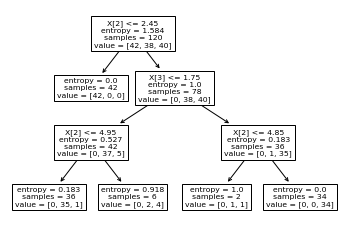

In [14]:
tree.plot_tree(model);

In [16]:
model.get_n_leaves()

5

In [15]:
## As this tree is not visible so we will display it with some another technique

In [16]:
# we will extract the feature names, class names and we will define the figure size so that our tree will be visible in a better way

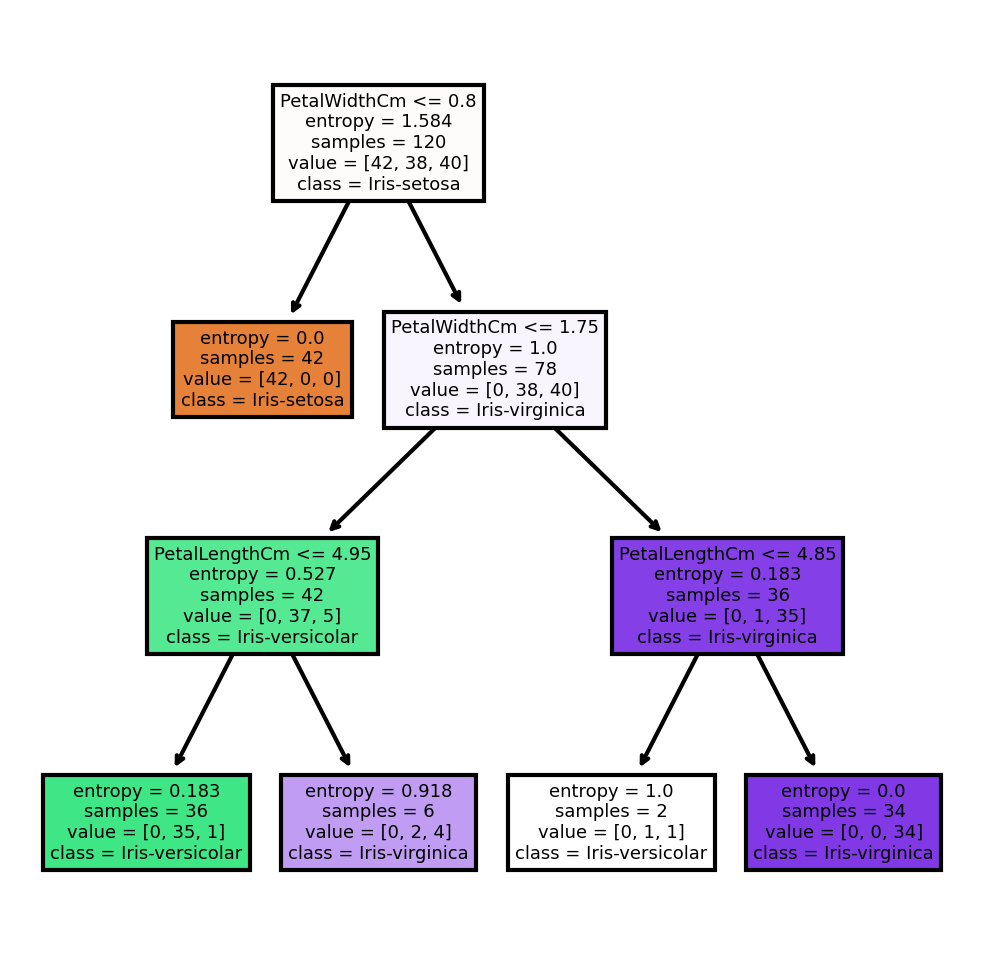

In [17]:
fn = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']
cn = ['Iris-setosa', 'Iris-versicolar', 'Iris-virginica']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   #dpi is the no. of pixels
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);       # filled = true will fill the values inside the boxes

In [18]:
# Predicting the builded model on our x-test data

In [18]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    13
2     9
0     8
dtype: int64

In [21]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [22]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

In [26]:
crosstable = pd.crosstab(y_test,preds)
crosstable

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [27]:
# Final step we will calculate the accuracy of our model

In [29]:
np.mean(preds==y_test)                               # We are comparing the predicted values with the actual values and calculating mean for the matches

0.9666666666666667

In [19]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        13
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Building a decision tree using CART method (Classifier model)

In [30]:
model_1 = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)

In [33]:
model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

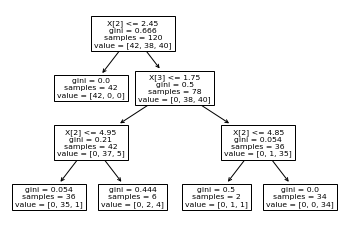

In [36]:
tree.plot_tree(model_1);

In [37]:
# predicting the values on xtest data

preds = model_1.predict(x_test)

In [38]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [39]:
pd.Series(preds).value_counts()

1    13
2     9
0     8
dtype: int64

In [40]:
# calculating accuracy of the model using the actual values

In [41]:
np.mean(preds==y_test)

0.9666666666666667

## Decision tree Regressor using CART

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
# Just converting the iris data into the following way as I want my Y to be numeric

X = iris.iloc[:,0:3]
Y = iris.iloc[:,3]

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 1)

In [23]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [24]:
preds1 = model_reg.predict(X_test)
preds1

array([0.1, 1. , 1.3, 0.1, 2.2, 1.4, 1.5, 0.2, 0.2, 2.3, 1.3, 0.2, 1.6,
       1.4, 1.6, 0.2, 1. , 1.2, 0.2, 0.1, 1.3, 1.2, 1.5, 0.2, 2.5, 1.3,
       0.1, 0.4, 1.4, 1.5, 1.4, 2.1, 1.3, 2.2, 1.9, 0.2, 1.1, 0.2, 1.5,
       1.4, 2.1, 0.2, 1.6, 2.2, 1.5, 1.4, 0.2, 0.2, 0.1, 1.3])

In [25]:
# Will see the correct and wrong matches

In [26]:
pd.crosstab(Y_test,preds1)

col_0,0.1,0.1,0.2,0.4,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.9,2.1,2.2,2.3,2.5
PetalWidthCm,,,,,,,,,,,,,,,,
0.2,2,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0
0.3,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0
0.4,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1.2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1.3,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,0
1.4,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0
1.5,0,0,0,0,0,0,2,0,1,1,2,0,0,0,0,0
1.6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [27]:
## We will calculate the accuracy by using score method,this is an either way to calculate the accuracy of the model

In [28]:
model_reg.score(X_test,Y_test)  # THis model.score function will first calculate the predicted values using the X_test data and then internaly only it will compare those values with the y_test data which is our actual data

0.8551746908392364

model_reg.score calculates r squared value and Aic value in background